# Customer Lifetime Value

## Fake data (Exponential)

In [35]:
import pandas as pd
import numpy as np
from faker import Faker

def create_customer_data(num_customers=4500, price_mean=100):
    fake = Faker()
    np.random.seed(42)
    
    customer_data = []
    
    for _ in range(num_customers):
        customer_id = fake.uuid4()
        
        # Generate price using Exponential distribution
        price = round(np.random.exponential(price_mean), 2)
        
        gross_margin = round(np.random.uniform(0.7, 0.9), 2)
        retention_rate = round(np.random.uniform(0.5, 1), 2)
        wacc = round(np.random.uniform(0.1, 0.2), 2)
        
        customer_data.append([
            customer_id,
            price,
            gross_margin,
            retention_rate,
            wacc
        ])
    
    columns = ['customer_id', 'price', 'gross_margin', 'retention_rate', 'wacc']
    return pd.DataFrame(customer_data, columns=columns)

# Generate the data
data = create_customer_data(price_mean=264)
data.head()

,customer_id,price,gross_margin,retention_rate,wacc
0,97b99bc5-88c5-4b6a-a0a9-2a8b584d18e9,123.89,0.89,0.87,0.16
1,6acc9cc8-ba1f-486e-bf57-6639ee53d40c,44.78,0.73,0.53,0.19
2,724009e0-e512-44a1-98ab-aa2af40afd0b,242.64,0.84,0.51,0.20
3,a2fc3a83-3c4c-49ad-bf32-b4fe5b21cca2,471.62,0.74,0.59,0.12
4,ab53e549-0b1d-4ed3-97f2-ee3f44afab70,95.77,0.80,0.72,0.13


## Fake data (Log-normal)

In [85]:
import pandas as pd
import numpy as np
from faker import Faker

def create_customer_data(num_customers=4500, empirical_mean=100, empirical_std=1):
    fake = Faker()
    np.random.seed(42)
    
    # Convert empirical mean and standard deviation to the parameters of the underlying normal distribution
    mu = np.log(empirical_mean**2 / np.sqrt(empirical_std**2 + empirical_mean**2))
    sigma = np.sqrt(np.log(empirical_std**2 / empirical_mean**2 + 1))
    
    customer_data = []
    
    for _ in range(num_customers):
        customer_id = fake.uuid4()
        
        # Generate price using Log-Normal distribution
        price = round(np.random.lognormal(mean=mu, sigma=sigma), 2)
        
        gross_margin = round(np.random.uniform(0.7, 0.99), 2)
        retention_rate = round(np.random.uniform(0.5, 1), 2)
        wacc = round(np.random.uniform(0.1, 0.2), 2)
        
        customer_data.append([
            customer_id,
            price,
            gross_margin,
            retention_rate,
            wacc
        ])
    
    columns = ['customer_id', 'price', 'gross_margin', 'retention_rate', 'wacc']
    return pd.DataFrame(customer_data, columns=columns)

# Generate the data
data = create_customer_data(empirical_mean=121, empirical_std=659.2)
data

,customer_id,price,gross_margin,retention_rate,wacc
0,d0082546-0c86-4e84-9930-57ddbb4b03c0,54.77,0.91,0.80,0.12
1,5e6e45c2-8a5e-4354-b408-196cd8ccd487,16.91,0.75,0.53,0.19
2,c64e8c27-82f7-4072-85d8-7646216819e1,405.86,0.71,0.98,0.18
3,a71ced9c-c4ce-4344-abcb-fa3595fefe9c,90.38,0.76,0.59,0.12
4,b96ac2d6-9818-4566-bde8-6459abf25eec,34.18,0.83,0.65,0.16
...,...,...,...,...,...
4495,828c0fa2-02a1-40dc-b68b-65b38435322f,10.26,0.98,0.52,0.17
4496,9c0d3643-4142-4650-86ed-8289a02de835,2.01,0.85,0.56,0.19
4497,e2135b0d-b852-4aad-ac34-a2d6a7a0353c,85.08,0.80,0.81,0.12
4498,e119313b-6cd0-4fe3-8547-ae533d6dbdc8,4.62,0.85,0.75,0.12


## Fake data (Pareto)

In [77]:
import pandas as pd
import numpy as np
from faker import Faker

def create_customer_data(num_customers=4500, price_min=20, price_alpha=0.6):
    fake = Faker()
    np.random.seed(42)
    
    customer_data = []
    
    for _ in range(num_customers):
        customer_id = fake.uuid4()
        
        # Generate price using Pareto distribution
        price = round((np.random.pareto(price_alpha) + 1) * price_min, 2)
        
        gross_margin = round(np.random.uniform(0.7, 0.9), 2)
        retention_rate = round(np.random.uniform(0.5, 1), 2)
        wacc = round(np.random.uniform(0.1, 0.2), 2)
        
        customer_data.append([
            customer_id,
            price,
            gross_margin,
            retention_rate,
            wacc
        ])
    
    columns = ['customer_id', 'price', 'gross_margin', 'retention_rate', 'wacc']
    return pd.DataFrame(customer_data, columns=columns)

# Generate the data
data = create_customer_data()
data

,customer_id,price,gross_margin,retention_rate,wacc
0,22189858-7d5a-419f-842e-4da172a05930,43.72,0.89,0.87,0.16
1,a75e87e7-cff2-4167-aa10-79aa87d40bd4,26.53,0.73,0.53,0.19
2,673347cc-9aaa-42e5-849b-11fcf9ab7497,92.53,0.84,0.51,0.20
3,b49c3342-fc78-4407-a5f1-5ec96304e1e2,392.73,0.74,0.59,0.12
4,d401167d-64ac-41ec-a72a-9bb3e7aef421,36.61,0.80,0.72,0.13
...,...,...,...,...,...
4495,25078820-291e-46fe-a950-e7f8a38251a3,56.18,0.73,0.86,0.12
4496,3e900ff6-be18-4457-b107-e125b173315e,187.09,0.80,0.73,0.19
4497,54341e78-9a60-4733-94f7-ff385f6a37de,156.16,0.71,0.65,0.19
4498,591ed1bc-7ebc-4185-b637-408ef4f39e31,20.63,0.81,0.86,0.16


## Calculate CLV

$$\mathbb{E}[\text{CLV}] = \dfrac{m (1 + d)}{1 + d -r}$$

- $m$ is contribution margin
- $d$ is discount rate or $\text{WACC}$
- $r$ is retention rate

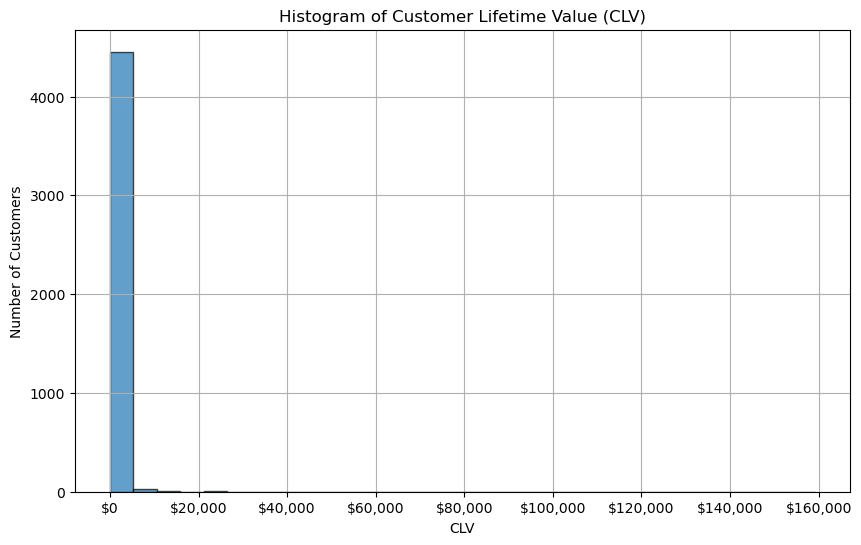

Customer Equity: $1,772,299.07
Average CLV: $393.84
Top 1% customers' CLV share: 38.85%
Top 10% customers' CLV share: 76.63%
Top 20% customers' CLV share: 87.32%


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def calculate_clv(data):
    # Extract necessary columns
    price = data['price']
    gross_margin = data['gross_margin']
    retention_rate = data['retention_rate']
    wacc = data['wacc']
    
    # Calculate m, r, d
    m = price * gross_margin
    r = retention_rate
    d = wacc
    
    # Calculate CLV
    clv = (m * (1 + d)) / (1 + d - r)
    
    # Plot histogram of CLV
    plt.figure(figsize=(10, 6))
    plt.hist(clv, bins=30, edgecolor='k', alpha=0.7)
    plt.title('Histogram of Customer Lifetime Value (CLV)')
    plt.xlabel('CLV')
    plt.ylabel('Number of Customers')
    plt.grid(True)
    
    # Format x-axis labels as integers in dollar format
    formatter = FuncFormatter(lambda x, _: f'${int(x):,}')
    plt.gca().xaxis.set_major_formatter(formatter)
    
    plt.show()
    
    # Calculate and print Customer Equity
    customer_equity = np.sum(clv)
    print(f"Customer Equity: ${customer_equity:,.2f}")
    
    # Calculate and print Average CLV
    average_clv = np.mean(clv)
    print(f"Average CLV: ${average_clv:,.2f}")
    
    # Calculate % CLV share of the top 1%, top 10%, and top 20% of customers
    num_customers = len(clv)
    top_1_percent = int(np.ceil(0.01 * num_customers))
    top_10_percent = int(np.ceil(0.10 * num_customers))
    top_20_percent = int(np.ceil(0.20 * num_customers))
    
    clv_sorted = np.sort(clv)[::-1]  # Sort CLV in descending order
    clv_top_1_percent_share = np.sum(clv_sorted[:top_1_percent]) / customer_equity * 100
    clv_top_10_percent_share = np.sum(clv_sorted[:top_10_percent]) / customer_equity * 100
    clv_top_20_percent_share = np.sum(clv_sorted[:top_20_percent]) / customer_equity * 100
    
    print(f"Top 1% customers' CLV share: {clv_top_1_percent_share:.2f}%")
    print(f"Top 10% customers' CLV share: {clv_top_10_percent_share:.2f}%")
    print(f"Top 20% customers' CLV share: {clv_top_20_percent_share:.2f}%")

# Example usage
# Assuming 'data' is a DataFrame containing the relevant columns
calculate_clv(data)